In [2]:
from textstat.textstat import textstat
import csv

In [1]:
import beauty
import csv
import pandas
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline
beauty.set_tex(False)

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Reading Level Analysis for All Trump

In [3]:
trump_df = pandas.read_csv('data/all_trump.csv')
print len(trump_df)

#trump_df['A'] = df['A'].astype('str')
trump_df.head()


2877


,title,url,org,date_written,byline,body
0,11 million watch Trump and Cruz spar on Fox Bu...,http://www.latimes.com/la-et-ct-debate-ratings...,latimes,2016-01-15 20:25:00,NaN,Fox Business Network\n's Republican primary de...
1,15 Protests That Helped Expose Trump's Dangero...,http://www.huffingtonpost.com/chelsea-byers/15...,huffpo,2016-03-01 18:18:05,NaN,Donald Trump has built a platform for himself ...
2,2016 match-up: Obama vs Trump,http://www.politico.com/story/2016/01/state-of...,politico,2016-01-13 05:44:15,NaN,\nWHITE HOUSE\n\n01/13/16 12:59 AM EST\n\n ...
3,2016 Race: Measuring Donald Trump’s Supporters...,http://www.nytimes.com/2016/02/25/upshot/measu...,nyt,2016-02-23 19:47:11,LYNN VAVRECK,Exit poll data from the South Carolina primary...
4,2nd former Mexican president unloads on Donald...,http://feeds.foxnews.com/~r/foxnews/world/~3/6...,fox,2016-02-27 22:15:13,NaN,\n\nMEXICO CITY – Former Mexican President Fe...


Average Flesch-Kincaid grade for AP stories: 8.93694820994


(0, 100)

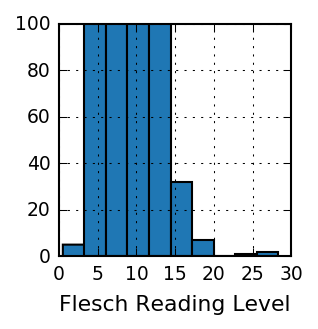

In [5]:
trump_df['flesch'] = trump_df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)

Average Flesch-Kincaid grade for AP stories: 8.93694820994


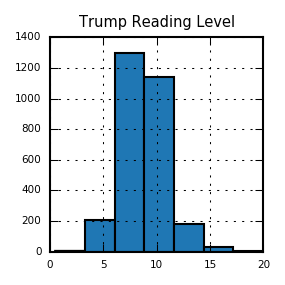

In [14]:
print "Average Flesch-Kincaid grade for AP stories:", trump_df['flesch'].mean()
# Average Flesch-Kincaid grade for AP stories: 9.97941176471
trump_df['flesch'].hist()
plt.title('Trump Reading Level', fontsize=7)
plt.xlim([0,20])
plt.tick_params(axis='both', which='major', labelsize=5)
plt.tight_layout()
plt.savefig('FIGS/trump_overall_flesch.png')
plt.show()


Average Gunning-Fog grade for AP stories: 9.39270072993


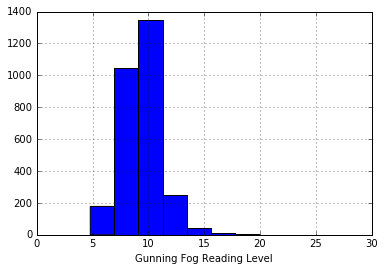

In [13]:
trump_df['gunning_fog'] = trump_df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
print "Average Gunning-Fog grade for AP stories:", trump_df['gunning_fog'].mean()
# Average Flesch-Kincaid grade for AP stories: 9.85789473684
trump_df['gunning_fog'].hist().set_xlabel("Gunning Fog Reading Level") 


# Reading level by Org

In [20]:
orgs = ['nyt', 'wsj', 'cnn', 'fox', 'ap', 'reuters', 'politico', 'mcclatchy', 'buzzfeed', 'huffpo','latimes']
for o in orgs:
    trump_df['flesch_' + o] = trump_df[trump_df['org'] == o]['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
    print "Average Flesch-Kincaid grade for " + o + " stories:", trump_df['flesch_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Flesch-Kincaid grade for nyt stories: 7.35640243902
Average Flesch-Kincaid grade for wsj stories: 7.63269230769
Average Flesch-Kincaid grade for cnn stories: 9.33620689655
Average Flesch-Kincaid grade for fox stories: 8.98108108108
Average Flesch-Kincaid grade for ap stories: 9.39463601533
Average Flesch-Kincaid grade for reuters stories: 10.1630681818
Average Flesch-Kincaid grade for politico stories: 8.47330016584
Average Flesch-Kincaid grade for mcclatchy stories: 8.38108108108
Average Flesch-Kincaid grade for buzzfeed stories: 12.2416666667
Average Flesch-Kincaid grade for huffpo stories: 9.48325242718
Average Flesch-Kincaid grade for latimes stories: 9.78532110092


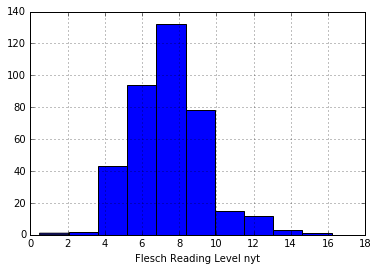

In [10]:
o = 'nyt'
trump_df['flesch_'+ o].hist().set_xlabel("Flesch Reading Level " + o) 

In [23]:
for o in orgs:
    trump_df['gunning_' + o] = trump_df[trump_df['org'] == o]['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
    print "Average Gunning Fog grade for " + o + " stories:", trump_df['gunning_' + o].mean()
    # Average Flesch-Kincaid grade for AP stories: 9.97941176471
    

Average Gunning Fog grade for nyt stories: 7.94634146341
Average Gunning Fog grade for wsj stories: 7.82564102564
Average Gunning Fog grade for cnn stories: 9.62528735632
Average Gunning Fog grade for fox stories: 9.12837837838
Average Gunning Fog grade for ap stories: 9.33026819923
Average Gunning Fog grade for reuters stories: 9.76363636364
Average Gunning Fog grade for politico stories: 10.4948590381
Average Gunning Fog grade for mcclatchy stories: 8.55675675676
Average Gunning Fog grade for buzzfeed stories: 11.98
Average Gunning Fog grade for huffpo stories: 9.14077669903
Average Gunning Fog grade for latimes stories: 9.47889908257


In [24]:
for o in orgs:
    trump_df['ease_' + o] = trump_df[trump_df['org'] == o]['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)
    print "Average F-K Reading Ease for " + o + " stories:", trump_df['ease_' + o].mean()
 
    

Average F-K Reading Ease for nyt stories: 68.8467073171
Average F-K Reading Ease for wsj stories: 66.3479487179
Average F-K Reading Ease for cnn stories: 62.0714367816
Average F-K Reading Ease for fox stories: 62.4208445946
Average F-K Reading Ease for ap stories: 60.2996168582
Average F-K Reading Ease for reuters stories: 56.7761931818
Average F-K Reading Ease for politico stories: 72.1448922056
Average F-K Reading Ease for mcclatchy stories: 64.2143243243
Average F-K Reading Ease for buzzfeed stories: 51.7928333333
Average F-K Reading Ease for huffpo stories: 58.8816262136
Average F-K Reading Ease for latimes stories: 58.2434862385
